In [1]:
import matplotlib.pyplot as plt
# importing matplot librariry for plotting the data

In [2]:
class GameOfLife:
#    A simplified implementation of Conway's Game of Life.
    
    def __init__(self, x_dim, y_dim):
        self.grid = [[0]*y_dim for _ in range(x_dim)]
#   Initializes a 2D grid of given dimensions filled with dead cells (0s).
#   Args: x_dim (int): Number of rows in the grid,   y_dim (int): Number of columns in the grid.

    def get_grid(self):
        return self.grid
#   Returns: list: 2D list representing the grid.
    
    def print_grid(self):
        for row in self.grid:
            print(' | '.join(map(str, row)))
            print('-' * (len(row) * 4))
#   Prints the grid in a human-readable format with cell separators.
    
    def populate_grid(self, coord):
        for i, j in coord:
            self.grid[i][j] = 1
        return self.grid
#   Sets specified coordinates in the grid to 1 (alive).
#   Args: coord (list of tuples): List of (row, col) positions.
        
    def make_step(self):
        r, c = len(self.grid), len(self.grid[0])
        new_grid = [[0]*c for _ in range(r)]
        for i in range(r):
            for j in range(c):
                s = sum(self.grid[x][y] for x in range(i-1, i+2)
                        for y in range(j-1, j+2)
                        if 0 <= x < r and 0 <= y < c and (x, y) != (i, j))
                new_grid[i][j] = int(s == 3 or (self.grid[i][j] and s == 2))
        self.grid = new_grid
        return self.grid
#   Updates the grid to the next state based on the Game of Life rules.
#   Rules: A live cell with 2 or 3 live neighbors stays alive. A dead cell with exactly 3 live neighbors becomes alive. All other cells die/remain dead.

    def make_n_steps(self, n):
        for _ in range(n):
            self.make_step()
        return self.grid
#   Applies the game logic for `n` steps.
#   Args: n (int): Number of steps to simulate.
            
    def draw_grid(self):
        r, c = len(self.grid), len(self.grid[0])
        x, y = [], []
        for i in range(c):
            for j in range(r):
                x.append(j)
                y.append(i)
                    
        fig, ax = plt.subplots(figsize=(9, 9))
        ax.scatter(x, y, s=150, c=self.grid, edgecolors='k', marker='o')
        ax.set_xlim(-1, r)
        ax.set_ylim(-1, c)
        ax.invert_yaxis()
        plt.show()
#   Visually displays the current grid using matplotlib, Live cells are shown as filled squares on a scatter plot.

In [3]:
game=GameOfLife(3,3)
game.get_grid()

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [4]:
game.print_grid()

0 | 0 | 0
------------
0 | 0 | 0
------------
0 | 0 | 0
------------


In [5]:
# Initialize a 3x3 game
game = GameOfLife(5, 5)

# Populate the grid
game.populate_grid([(2, 2), (2, 3), (2, 4)])

# Test the populate_grid method by printing the grid
game.print_grid()  

0 | 0 | 0 | 0 | 0
--------------------
0 | 0 | 0 | 0 | 0
--------------------
0 | 0 | 1 | 1 | 1
--------------------
0 | 0 | 0 | 0 | 0
--------------------
0 | 0 | 0 | 0 | 0
--------------------


0 | 0 | 0 | 0 | 0
--------------------
0 | 0 | 0 | 1 | 0
--------------------
0 | 0 | 0 | 1 | 0
--------------------
0 | 0 | 0 | 1 | 0
--------------------
0 | 0 | 0 | 0 | 0
--------------------


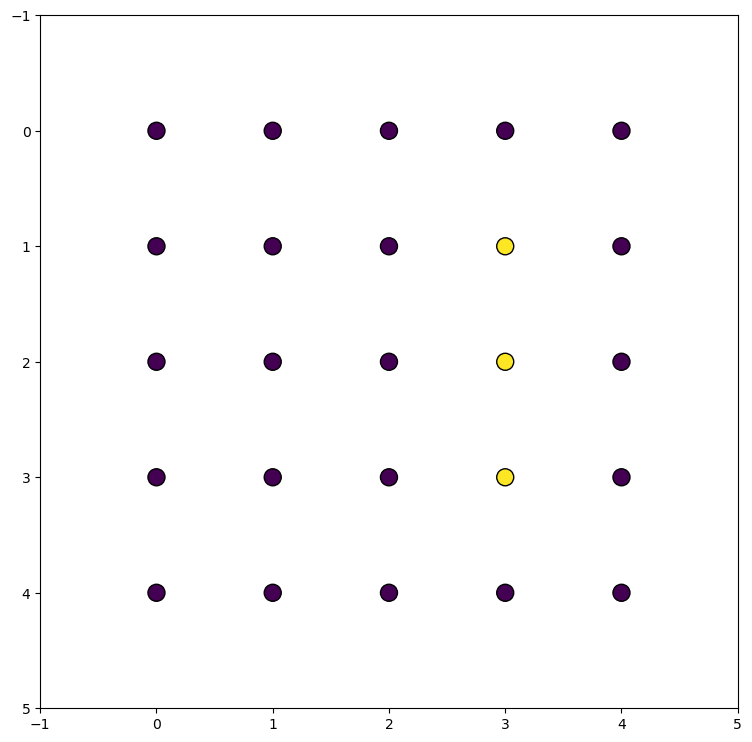

In [6]:
game.make_n_steps(5)
game.print_grid()
game.draw_grid()